# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Сразу бросается в глаза, что в столбце education одинаковые значения написаны в разных регистрах. Уравняю регистр во всем наборе данных. 

In [3]:
df['education'] = df['education'].str.lower()

In [4]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [5]:
df.shape

(21525, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Шаг 2. Предобработка данных

### Обработка пропусков

In [7]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Видно, что столбцы days_employed и total_income содержат нулевые значения. Причем их одинаковое количество. Это подозрительно. Проанализирую это.

In [8]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Столбец days_employed — содержит неорректные данные. Например отрицательные начения. Исправляю это.

In [9]:
df['days_employed'] = df['days_employed'].abs()

Также выделяется значение 340266.072047. Оно явно не реальное. Для полноты картины построю гистограмму.

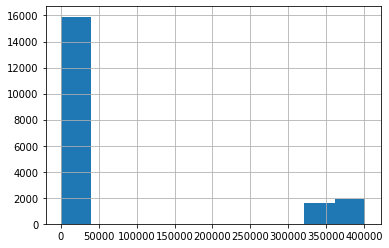

In [10]:
df['days_employed'].hist()

На гистограмме хорошо видно раделение стажа на нормальные начения (слева) и аномальные (справа). Предположим, что аномальные значения - это стаж, ошибочно введенный в днях. Содадим новый столбец years_employed, в который внесем нормальные значения стажа, переведенные в года, а аномальные начения переведем сначала в дни а потом в года.

In [11]:
df['years_employed'] = df['days_employed'].transform(lambda x: x/365 if x<50000 else x/24/365) 

Предположим, что стаж и доход зависят от типа занятости. Тогда вычислим медианные значения стажа и дохода в зависимости от типа занятости. А после подставим их в пропущенные значения.

In [12]:
lost_values_median = df.groupby('income_type').agg({'total_income':'median', 'years_employed': 'median'})
for i in lost_values_median.index:
    df.loc[(df['income_type'] == i) & (df['total_income'].isnull()), 'total_income'] = lost_values_median['total_income'][i]
    df.loc[(df['income_type'] == i) & (df['years_employed'].isnull()), 'years_employed'] = lost_values_median['years_employed'][i]

Столбец days_employed не будет учавствовать в дальнейшем анализе, поэтому пропущенные начения я заменю на нулевые.

In [13]:
df['days_employed'] = df['days_employed'].fillna(0)

In [14]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
dtype: int64

In [15]:
df.shape

(21525, 13)

Замена произошла и нет потерянных данных.

### Замена типа данных

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
years_employed      21525 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


Столбец days_employed, years_employed и total_income  — переведу в тип INT.


In [17]:
df['days_employed'] = df['days_employed'].astype('int')
df['years_employed'] = df['years_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
years_employed      21525 non-null int64
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


In [18]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38


Тип изменен верно и все значения положительные.

### Обработка дубликатов

In [19]:
df.duplicated().sum()

71

Машинный поиск обнаружил 71 дубликат. Перед их удалением я просмотрю каждую колонку для поиска аномалий.

In [20]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Отрицательное число детей и 20 детей - больше похоже на опечатку. Заменю -1 на 1, а 20 на 2.

In [21]:
df.loc[df['children'] == -1, 'children'] = 1
df.loc[df['children'] == 20, 'children'] = 2

In [22]:
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Неточности устранены.

In [23]:
df.shape


(21525, 13)

Данные не потеряны.

In [24]:
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

101 человек с возрастом 0 лет. Это явная ошибка. Возможно возраст коррелирует с семейным статусом. На основании этого посчитаю медиану для каждого семейного статуса и заменю 0 на медиану в соответствующей группе.

In [25]:
correl_family_status_and_dob_years = df.groupby('family_status').agg({'dob_years':'median'})
for j in correl_family_status_and_dob_years.index:
    df.loc[(df['family_status'] == j) & (df['dob_years'] == 0), 'dob_years'] = correl_family_status_and_dob_years['dob_years'][j]


In [26]:
df['dob_years'].value_counts()

41    628
35    617
40    609
34    603
38    598
42    597
33    581
39    573
36    571
43    562
31    560
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
46    485
52    484
47    480
54    479
58    466
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Замена успешно произведена.

In [27]:
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Тут все хорошо.

In [28]:
df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Тут все хорошо.

In [29]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Тут все хорошо.

In [30]:
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

Тут все хорошо.

In [31]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Тут почти все хорошо. Одно значение непонятно. Это наблюдение можно удалить, т.к. оно не влияет на набор данных.

In [32]:
df['gender'] = df.loc[df['gender'] != 'XNA', 'gender']

In [33]:
df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

In [34]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

Тут все хорошо.

In [35]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Тут все хорошо.

In [36]:
df['total_income'].value_counts()

142594    1105
172357     509
118514     414
150447     147
126262       3
          ... 
101387       1
138249       1
280240       1
390148       1
264193       1
Name: total_income, Length: 18608, dtype: int64

Тут все хорошо.

In [37]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

В строке 'purpose' содержится много форм одинаковых слов. Удалим дубликаты и проведем лемматизацию.

In [38]:
df.duplicated().sum()

72

In [39]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [40]:
df.shape

(21453, 13)

Исходных наблюдений - 21525. После удаления дубликатов - 21453. Данные не потеряны.

### Лемматизация

Создаю функцию для лемматизации одной строки и применю ее к столбцу purpose.

In [41]:
from pymystem3 import Mystem
from collections import Counter

m = Mystem()

def lemma_row(row):
    #row = row.split(' ')
    lemmas = m.lemmatize(row)
    return lemmas


 

In [42]:
df['purpose_lemma'] = df['purpose'].apply(lemma_row)
df['purpose_lemma'].value_counts()


[автомобиль, \n]                                          972
[свадьба, \n]                                             791
[на,  , проведение,  , свадьба, \n]                       767
[сыграть,  , свадьба, \n]                                 765
[операция,  , с,  , недвижимость, \n]                     675
[покупка,  , коммерческий,  , недвижимость, \n]           661
[операция,  , с,  , жилье, \n]                            652
[покупка,  , жилье,  , для,  , сдача, \n]                 651
[операция,  , с,  , коммерческий,  , недвижимость, \n]    650
[покупка,  , жилье, \n]                                   646
[жилье, \n]                                               646
[покупка,  , жилье,  , для,  , семья, \n]                 638
[строительство,  , собственный,  , недвижимость, \n]      635
[недвижимость, \n]                                        633
[операция,  , со,  , свой,  , недвижимость, \n]           627
[строительство,  , жилой,  , недвижимость, \n]            624
[покупка

Из всего списка выделяем 4 основных слова, которые встречаются во всем списке. Это - недвижимость + жилье, свадьба, автомобиль и образование.

### Категоризация данных

После лемматизации мы разделим данные о целях кредита на 4 основные группы. Для этого создам функцию категоризации и применю ее к столбцу purpose.

In [43]:
category_type = ['недвижимость', 'жилье', 'свадьба', 'автомобиль', 'образование']
def purpose_category(row):
    if category_type[0] in row or category_type[1] in row: return 'недвижимость'
    elif category_type[2] in row: return 'свадьба'
    elif category_type[3] in row: return 'автомобиль'
    elif category_type[4] in row: return 'образование'

In [44]:
df['purpose_type'] = df['purpose_lemma'].apply(purpose_category)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,purpose_lemma,purpose_type
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,"[покупка, , жилье, \n]",недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,"[приобретение, , автомобиль, \n]",автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,"[покупка, , жилье, \n]",недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,"[дополнительный, , образование, \n]",образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38,"[сыграть, , свадьба, \n]",свадьба


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для ответа на этот вопрос сделаем выборку.

In [57]:
debt_children = df.query('debt == 1').groupby('children').agg(debt_with_children = ('children','count'))
debt_children['all_debt'] = df.groupby('children').agg(all_debt = ('children','count'))
debt_children['ratio_debt_%'] = (debt_children['debt_with_children'] / debt_children['all_debt'])*100
debt_children.sort_values('ratio_debt_%', ascending = False)

,debt_with_children,all_debt,ratio_debt_%
children,,,
4,4,41,9.756098
2,202,2128,9.492481
1,445,4855,9.165808
3,27,330,8.181818
0,1063,14090,7.544358


Вывод: клиенты с детьми в целом лучше отдают кредиты по сравнению с бездетными клиентами.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [56]:
debt_family = df.query('debt == 1').groupby('family_status').agg(debt_and_family = ('family_status','count'))
debt_family['all_debt'] = df.groupby('family_status').agg(all_debt = ('family_status','count'))
debt_family['ratio_debt_%'] = (debt_family['debt_and_family'] / debt_family['all_debt'])*100
debt_family.sort_values('ratio_debt_%', ascending = False)

,debt_and_family,all_debt,ratio_debt_%
family_status,,,
Не женат / не замужем,274,2810,9.750890
гражданский брак,388,4150,9.349398
женат / замужем,931,12339,7.545182
в разводе,85,1195,7.112971
вдовец / вдова,63,959,6.569343


Вывод: клиенты, состоящие в официальных отношениях или ранее состоявшие лучше отдают кредиты, чем люди без отношений и без официального статуса.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Категоризирую данные о доходах. Введу распределение на 4 категории по квартилям.

In [48]:
df['quartile'] = pd.qcut(df['total_income'], q=4, labels = ['низкий', 'средний', 'выше среднего', 'высокий'])
df['quartile'] 


0              высокий
1              средний
2        выше среднего
3              высокий
4        выше среднего
             ...      
21448          высокий
21449    выше среднего
21450           низкий
21451          высокий
21452           низкий
Name: quartile, Length: 21453, dtype: category
Categories (4, object): [низкий < средний < выше среднего < высокий]

Сгруппирую данные и проверю как % невозвратов меняется в зависимости от группы дохода.
    

In [58]:
debt_income = df.query('debt == 1').groupby('quartile').agg(debt_total_income = ('quartile','count'))
debt_income['all_debt'] = df.groupby('quartile').agg(all_debt = ('quartile','count'))
debt_income['ratio_debt_%'] = (debt_income['debt_total_income'] / debt_income['all_debt'])*100
debt_income.sort_values('ratio_debt_%', ascending = False)

,debt_total_income,all_debt,ratio_debt_%
quartile,,,
средний,483,5478,8.817087
выше среднего,448,5248,8.536585
низкий,427,5364,7.960477
высокий,383,5363,7.141525


Вывод: клиенты со средним и выше среднего уровнем дохода менее надежны, чем люди с низким и высоким уровнем дохода.

- Как разные цели кредита влияют на его возврат в срок?

In [55]:
purpose_debt_pivot = pd.pivot_table(df, index = 'purpose_type', values = 'debt', aggfunc = ['count', 'sum'])
purpose_debt_pivot.columns = ['All', 'Debetors']
purpose_debt_pivot['% of debt'] = (purpose_debt_pivot['Debetors'] / purpose_debt_pivot['All']) * 100
purpose_debt_pivot.sort_values('% of debt', ascending = False)

,All,Debetors,% of debt
purpose_type,,,
автомобиль,4306,403,9.359034
образование,4013,370,9.220035
свадьба,2323,186,8.006888
недвижимость,10811,782,7.233373


Вывод: кредит на образование и автомобиль являются наиболее рискованными, а кредит на недвижимость и свадьбу наоборот.

## Шаг 4. Общий вывод

1. Клиенты с детьми в целом лучше отдают кредиты по сравнению с бездетными клиентами.
2. Клиенты, состоящие в официальных отношениях или ранее состоявшие лучше отдают кредиты, чем люди без отношений и без официального статуса.
3. Клиенты со средним и выше среднего уровнем дохода более надежны, чем люди с низким и высоким уровнем дохода.
4. Кредит на образование и автомобиль являются наиболее рискованными, а кредит на недвижимость и свадьбу наоборот.

Общий вывод: Более рискованными являются кредиты для бездетных клиентов. Клиенты имеющие или имевшие официальный статус отношений более надежны чем не имеющие. Средний и выше среднего уровни дохода менее надежны. Кредиты на недвижимось и свадьбу более надежны, чем на образование и автомобиль.